# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Rini Wulan Sari]
- **Email:** [riniwulans03@gmail.com]
- **ID Dicoding:** [rini_wulan_sari345]

## Menentukan Pertanyaan Bisnis

- Tampilkan 5 produk yang penjualan nya tertinggi di tahun 2017
- Tampilkan 5 produk yang rating nya tinggi di tahun 2018

## Import Semua Packages/Library yang Digunakan

## Data Wrangling

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


### Gathering Data

In [6]:
import pandas as pd # type: ignore
product_ds = pd.read_csv("products_dataset.csv")

In [7]:
import pandas as pd
order_itm_ds = pd.read_csv("order_items_dataset.csv")

**Insight:**
- Data product akan digunakan untuk mengambil 5 product
- Data order item akan digunakan untuk melihat harga penjualan tiap tahun nya

### Assessing Data

### Assessing data Products_dataset

In [8]:
product_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [9]:
product_ds.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


- terdapat data NULL dibagian:
    - product_category_name	610
    - product_name_lenght	610
    - product_description_lenght	610
    - product_photos_qty	610
    - product_weight_g	2
    - product_length_cm	2
    - product_height_cm	2
    - product_width_cm	2

In [10]:
print("Jumlah duplikasi: ", product_ds.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
product_ds.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Assessing data order_items


In [12]:
order_itm_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [13]:
order_itm_ds.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [14]:
print("Jumlah duplikasi: ", order_itm_ds.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
order_itm_ds.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- pada data set order item tidak ada yang perlu diperbaiki
- pada data set product data terdapat null sehingga harus di cleansing

### Cleaning Data

##### Memperbaiki data kosong


In [16]:
product_ds[['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']] = product_ds[['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].fillna(value="Prefer not to say")
print(product_ds.isna().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


**Insight:**
- data di isi dengan prefer not to say karena tidak terdapat kategory produk dan kita tidak mengetahui produk apa yang ada di kategory

## Exploratory Data Analysis (EDA)

In [17]:
print(product_ds.head()) # melihat baris pertama tabel product

                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

  product_name_lenght product_description_lenght product_photos_qty  \
0                40.0                      287.0                1.0   
1                44.0                      276.0                1.0   
2                46.0                      250.0                1.0   
3                27.0                      261.0                1.0   
4                37.0                      402.0                4.0   

  product_weight_g product_length_cm product_height_cm product_width_cm  
0            225.0              16.0              10.0             14.0  
1           1000.0              30.0              18

In [18]:
print(product_ds.info()) #untuk mengetahui informasi dari data set product

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  32951 non-null  object
 1   product_category_name       32951 non-null  object
 2   product_name_lenght         32951 non-null  object
 3   product_description_lenght  32951 non-null  object
 4   product_photos_qty          32951 non-null  object
 5   product_weight_g            32951 non-null  object
 6   product_length_cm           32951 non-null  object
 7   product_height_cm           32951 non-null  object
 8   product_width_cm            32951 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB
None


In [19]:
print(product_ds.describe())

                              product_id product_category_name  \
count                              32951                 32951   
unique                             32951                    74   
top     1e9e8ef04dbcff4541ed26657ea517e5       cama_mesa_banho   
freq                                   1                  3029   

        product_name_lenght product_description_lenght  product_photos_qty  \
count               32951.0                      32951             32951.0   
unique                 67.0                       2961                20.0   
top                    60.0          Prefer not to say                 1.0   
freq                 2182.0                        610             16489.0   

        product_weight_g  product_length_cm  product_height_cm  \
count            32951.0            32951.0            32951.0   
unique            2205.0              100.0              103.0   
top                200.0               16.0               10.0   
freq          

In [20]:
print(order_itm_ds.head()) # melihat baris pertama tabel order

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

In [21]:
print(order_itm_ds.info()) #untuk mengetahui informasi dari data set order

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


In [22]:
print(product_ds.describe())

                              product_id product_category_name  \
count                              32951                 32951   
unique                             32951                    74   
top     1e9e8ef04dbcff4541ed26657ea517e5       cama_mesa_banho   
freq                                   1                  3029   

        product_name_lenght product_description_lenght  product_photos_qty  \
count               32951.0                      32951             32951.0   
unique                 67.0                       2961                20.0   
top                    60.0          Prefer not to say                 1.0   
freq                 2182.0                        610             16489.0   

        product_weight_g  product_length_cm  product_height_cm  \
count            32951.0            32951.0            32951.0   
unique            2205.0              100.0              103.0   
top                200.0               16.0               10.0   
freq          

**Insight:**

**Pertanyaan 1:**
- Mengunakan tabel products_dataset dengan coloum product_category_name
-  Menggunakan tabel order_items_dataset dengan coloum price
- tabel_order_items_dataset dengan coloum shipping_limit_date
- fiter di tahun 2017 dan 5 product tertingi dari penjualan

**Pertanyaan 2:**
- Mengunakan tabel products_dataset dengan coloum product_category_name
- Menggunakan tabel order_items_dataset dengan coloum price
- tabel_order_items_dataset dengan coloum shipping_limit_date
- fiter di tahun 2018 dan 5 product tertingi dari penjualan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

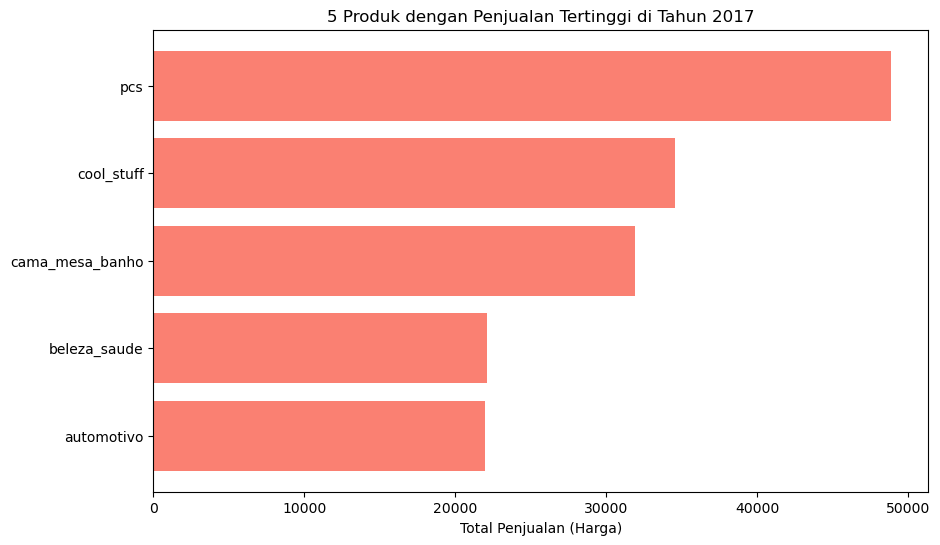

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat data ke dalam DataFrame
# Gantilah dengan path file Anda
products_dataset = pd.read_csv('products_dataset.csv')
order_items_dataset = pd.read_csv('order_items_dataset.csv')

# Mengonversi kolom shipping_limit_date ke tipe datetime
order_items_dataset['shipping_limit_date'] = pd.to_datetime(order_items_dataset['shipping_limit_date'])

# Filter data untuk tahun 2017
order_items_2017 = order_items_dataset[order_items_dataset['shipping_limit_date'].dt.year == 2017]

# Menghitung total penjualan per produk
total_sales_2017 = order_items_2017.groupby('product_id')['price'].sum().reset_index()

# Menggabungkan dengan products_dataset untuk mendapatkan nama kategori produk
merged_data_2017 = total_sales_2017.merge(products_dataset[['product_id', 'product_category_name']], on='product_id')

# Mengambil 5 produk dengan penjualan tertinggi
top_products_2017 = merged_data_2017.nlargest(7, 'price')

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(top_products_2017['product_category_name'], top_products_2017['price'], color='salmon')
plt.xlabel('Total Penjualan (Harga)')
plt.title('5 Produk dengan Penjualan Tertinggi di Tahun 2017')
plt.gca().invert_yaxis()  # Membalik sumbu y agar produk dengan penjualan tertinggi di atas
plt.show()

### Pertanyaan 2:

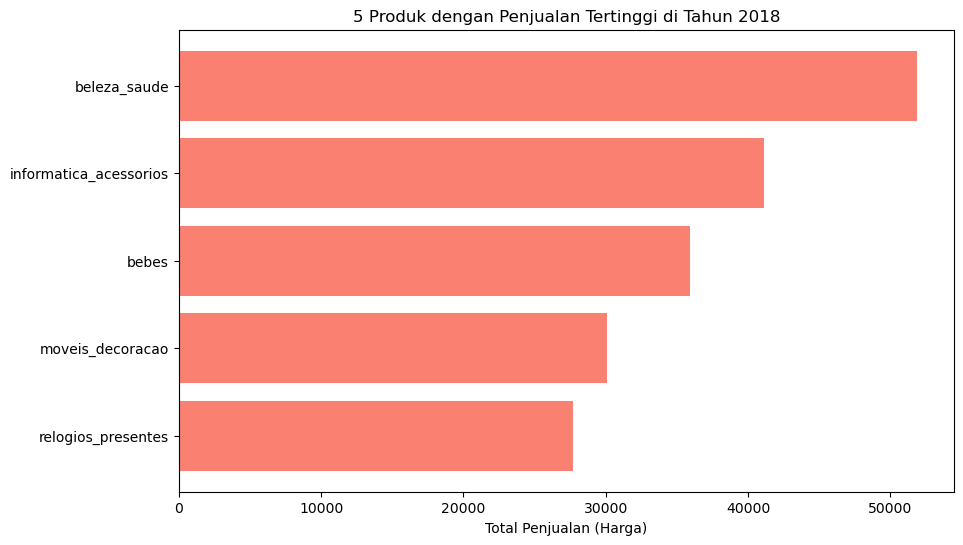

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat data ke dalam DataFrame
# Gantilah dengan path file Anda
products_dataset = pd.read_csv('products_dataset.csv')
order_items_dataset = pd.read_csv('order_items_dataset.csv')

# Mengonversi kolom shipping_limit_date ke tipe datetime
order_items_dataset['shipping_limit_date'] = pd.to_datetime(order_items_dataset['shipping_limit_date'])

# Filter data untuk tahun 2018
order_items_2018 = order_items_dataset[order_items_dataset['shipping_limit_date'].dt.year == 2018]

# Menghitung total penjualan per produk
total_sales_2018 = order_items_2018.groupby('product_id')['price'].sum().reset_index()

# Menggabungkan dengan products_dataset untuk mendapatkan nama kategori produk
merged_data_2018 = total_sales_2018.merge(products_dataset[['product_id', 'product_category_name']], on='product_id')

# Mengambil 5 produk dengan penjualan tertinggi
top_products_2018 = merged_data_2018.nlargest(7, 'price')

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(top_products_2018['product_category_name'], top_products_2018['price'], color='salmon')
plt.xlabel('Total Penjualan (Harga)')
plt.title('5 Produk dengan Penjualan Tertinggi di Tahun 2018')
plt.gca().invert_yaxis()  # Membalik sumbu y agar produk dengan penjualan tertinggi di atas
plt.show()

**Insight:**
- Dari tahun 2017 hingga 2018, produk beleza_saude (produk kecantikan dan kesehatan) menunjukkan performa penjualan yang konsisten dan tetap berada di daftar 5 produk terlaris. Ini menunjukkan bahwa beleza_saude memiliki permintaan yang stabil dan bisa dianggap sebagai kategori produk yang memiliki pasar yang kuat
- Pada tahun 2017, kategori produk seperti pcs, cool_suff, dan automotivo termasuk dalam produk terlaris, namun di tahun 2018, mereka tidak lagi masuk dalam daftar produk terlaris. Sebaliknya, kategori produk seperti informatica_acessorios, bebes, dan relogios_presentes mulai menunjukkan kenaikan signifikan di tahun 2018. Ini mengindikasikan adanya perubahan tren konsumen yang mungkin beralih pada produk-produk yang terkait dengan teknologi dan kebutuhan bayi.
- Produk beleza_saude memiliki peluang besar untuk diprioritaskan dalam stok karena terbukti memiliki penjualan yang stabil dari tahun ke tahun. Selain itu, perusahaan dapat mempertimbangkan untuk meningkatkan stok pada produk yang menunjukkan tren meningkat di 2018 seperti informatica_acessorios (aksesori teknologi) dan bebes (produk bayi) untuk memanfaatkan tren tersebut.
- Produk yang mengalami penurunan dalam popularitas dari 2017 ke 2018, seperti pcs dan automotivo, mungkin perlu dipertimbangkan ulang dalam strategi pemasaran atau disesuaikan dengan tren pasar terbaru agar tetap relevan bagi konsumen.

## Conclusion

### Conclusion

Berdasarkan analisis penjualan dari tahun 2017 dan 2018, dapat diambil kesimpulan sebagai berikut:

1. **Produk Penjualan Tertinggi Tahun 2017**:
   - Produk dengan penjualan tertinggi adalah: *pcs*, *cool_suff*, *cama_mesa_banho*, *beleza_saude*, dan *automotivo*.

2. **Produk Penjualan Tertinggi Tahun 2018**:
   - Produk dengan penjualan tertinggi adalah: *beleza_saude*, *informatica_acessorios*, *bebes*, *moveis_decoracao*, dan *relogios_presentes*.

3. **Produk yang Konsisten Laris**:
   - Dari data tersebut, **beleza_saude** adalah satu-satunya produk yang terus bertahan sebagai produk penjualan tertinggi baik di tahun 2017 maupun 2018. Hal ini menunjukkan bahwa produk tersebut memiliki permintaan yang stabil dan konsisten dari tahun ke tahun.

4. **Strategi Bisnis**:
   - **Meningkatkan stok** untuk produk-produk yang konsisten atau mengalami peningkatan penjualan seperti *beleza_saude*.
   - **Mempertahankan dan memantau kinerja** produk-produk yang laris di tahun tertentu, seperti *informatica_acessorios*, *bebes*, dan *relogios_presentes* pada tahun 2018, serta *pcs* dan *automotivo* di tahun 2017.

Dengan strategi ini, perusahaan dapat memaksimalkan keuntungan dengan berfokus pada produk yang memiliki potensi tinggi berdasarkan data historis penjualan.

In [25]:
!pip freeze > /content/requirements.txt


The system cannot find the path specified.


In [26]:
!cat /content/requirements.txt


'cat' is not recognized as an internal or external command,
operable program or batch file.


In [27]:
from google.colab import files
files.download('/content/requirements.txt')


ModuleNotFoundError: No module named 'google.colab'